In [29]:

# 패션 MNIST - 훈련세트, 테스트 세트 
from tensorflow import keras

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

In [30]:
# 모델 생성 함수 - 층 추가가 가능 
def model_fn(a_layer = None):
    model = keras.Sequential()
    model.add(keras.layers.Input(shape=(28,28))) # 입력층
    model.add(keras.layers.Flatten()) 
    model.add(keras.layers.Dense(100, activation='relu'))
    if a_layer:
        model.add(a_layer)
    
    model.add(keras.layers.Dense(10, activation='softmax'))

    return model

In [31]:
# model = model_fn()
model = model_fn(keras.layers.Dropout(0.3)) # 30% 비율의 밀집층의 출력을 0으로 랜덤하게 변경 
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [32]:
train_scaled = train_input / 255
test_scaled = test_input / 255

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# history = model.fit(train_scaled, train_target, epochs=20, validation_data=(test_scaled, test_target)) # history 객체 - 정확도, 손실률에 대한 각 에포크별 측정 데이터
# 13 에포크 이후 과대 적합 - 13 에포크가 최적 지점 
history = model.fit(train_scaled, train_target, epochs=13, validation_data=(test_scaled, test_target))

Epoch 1/13
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7435 - loss: 0.7228 - val_accuracy: 0.8437 - val_loss: 0.4417
Epoch 2/13
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8437 - loss: 0.4342 - val_accuracy: 0.8560 - val_loss: 0.3967
Epoch 3/13
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8585 - loss: 0.3890 - val_accuracy: 0.8626 - val_loss: 0.3821
Epoch 4/13
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8639 - loss: 0.3736 - val_accuracy: 0.8648 - val_loss: 0.3696
Epoch 5/13
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8679 - loss: 0.3580 - val_accuracy: 0.8672 - val_loss: 0.3704
Epoch 6/13
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8761 - loss: 0.3418 - val_accuracy: 0.8672 - val_loss: 0.3661
Epoch 7/13
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8740 - loss: 0.3396 - val_accuracy: 0.8762 - val_loss: 0.3471
Epoch 8/13
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8801 - loss: 0.3262 - 

In [33]:
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


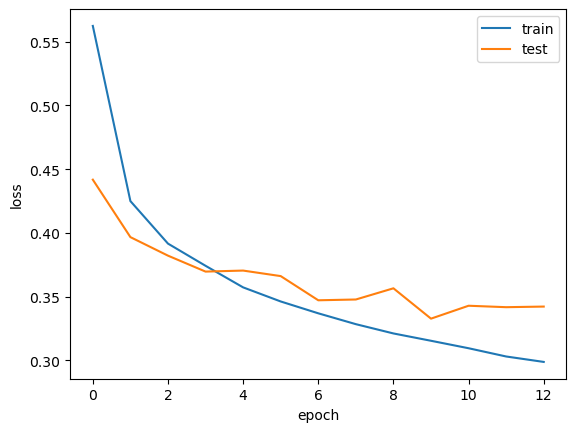

In [34]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss']) # 학습 세트 손실률 
plt.plot(history.history['val_loss']) # 테스트 세트 손실률 
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'test'])
plt.show()

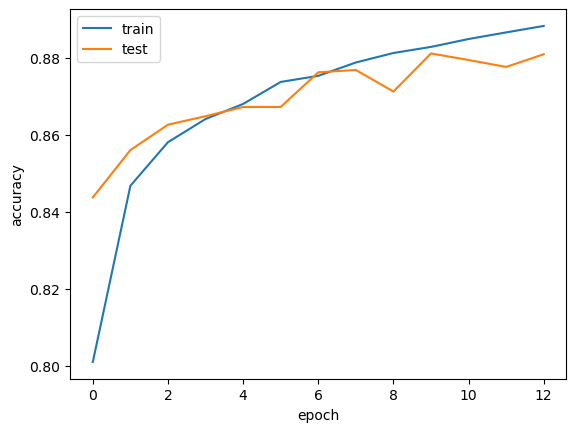

In [35]:
plt.plot(history.history['accuracy']) # 학습 세트 정확도 
plt.plot(history.history['val_accuracy']) # 테스트 세트 정확도 
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'test'])
plt.show()

In [36]:
# 1. 가중치만 저장, 2. 모델 전체 저장 
# model.save_weights("model.weights.h5")  # h5 - HDFS  - 가중치만 저장, 저장해준 모델과 동일한 구성 후 로드


In [37]:
# model = model_fn(keras.layers.Dropout(0.3))


In [38]:
# model.load_weights("model.weights.h5")  # 앞서 학습한 13에포크 가중치를 로드

In [39]:
# predictions = model.predict(test_scaled)

In [40]:
# import numpy as np
# np.mean(test_target == predictions.argmax(axis=1)) # 정답 1, 오답 0, 

In [41]:
# 2. 모델 전체 저장 
model.save("model-whole.keras")

In [42]:
# 저장된 모델 로드 
model = keras.models.load_model("model-whole.keras")

In [43]:
model.evaluate(test_scaled, test_target)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 781us/step - accuracy: 0.8801 - loss: 0.3429


[0.34214308857917786, 0.8809000253677368]